In [0]:
# ライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_blobs

Text(0, 0.5, 'Feature 2')

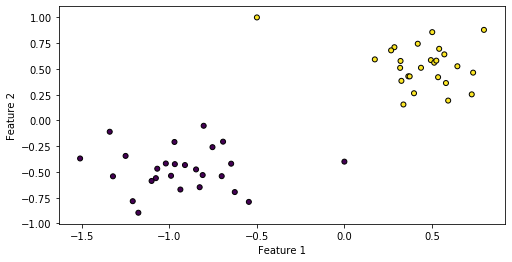

In [2]:
X, y = make_blobs(random_state=0,
                  n_samples=50, 
                  n_features=2, 
                  cluster_std=0.2,
                  centers=[(-1.0, -0.5),(0.5, 0.5)])

X = np.vstack((X, [0.0,-0.4],[-0.5,1.0]))
y = np.hstack((y, 0,1))

plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [3]:
model = LinearSVC(loss='hinge', C=1000000, random_state=0)
# モデルの訓練
model.fit(X, y)

LinearSVC(C=1000000, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)

In [4]:
# ロジスティック回帰モデルを作成
model2 = LogisticRegression(C=1.0, multi_class = 'ovr', max_iter=100, solver='liblinear',penalty='l2', random_state=0)

# モデルの訓練
model2.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [0]:
# 決定境界用の変数X_pltを作成
X_plt = np.linspace(-1.5, 1, 100)[:, np.newaxis]

# SVCの決定境界の作成
w = model.coef_[0]
b = model.intercept_[0]
decision_boundary = -w[0]/w[1] * X_plt - b/w[1]

# SVCの決定境界の上下にマージン作成
margin = 1/w[1]
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin

# ロジスティック回帰の決定境界
w2 = model2.coef_[0]
b2 = model2.intercept_[0]
decision_boundary2 = -w2[0]/w2[1] * X_plt - b2/w2[1]

<function matplotlib.pyplot.show>

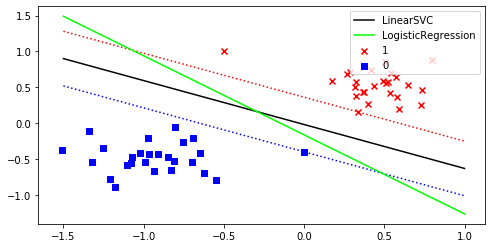

In [6]:
plt.figure(figsize=(8,4)) #プロットのサイズ指定

# 決定境界、マージンのプロット
plt.plot(X_plt, decision_boundary, linestyle = "-",  color='black', label='LinearSVC')
plt.plot(X_plt, gutter_up, linestyle = ":", color='red')
plt.plot(X_plt, gutter_down, linestyle = ":",color='blue')
plt.plot(X_plt, decision_boundary2, linestyle = "-", color='lime', label='LogisticRegression')

# 訓練データの散布図
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='r', marker='x', label='1')
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c='b', marker='s', label='0')
plt.legend(loc='best')
plt.show